## fashion mninst example

In [1]:
import tensorflow as tf
import numpy as np 
#tf.__version__
#tf.test.is_gpu_available
#tf.test.gpu_device_name
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


#### The Fashion MNIST data is available directly in the tf.keras datasets API.
Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

###### What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0
If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. 

training labels  9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.


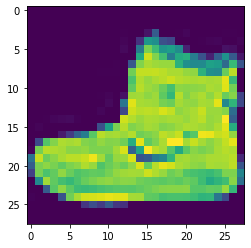

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print("training labels ",train_labels[0])
print(train_images[0])

Let's now design the model. 
Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

In [4]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4981 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3751 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3352 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3128 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2941 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2811 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2689 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2579 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2483 - accuracy: 0.9070
Epoch 10/10
6

In [5]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3329 - accuracy: 0.8838


[0.3328890634059906, 0.8838]

## exercices 

#### exercice 1 

In [10]:
clasifications = model.predict(test_images)
print(clasifications[0])

[8.0171505e-09 2.4052033e-08 2.8139324e-11 6.8414857e-11 1.2148168e-09
 1.3793139e-04 5.5855494e-08 1.3678984e-02 9.5899885e-08 9.8618293e-01]


In [11]:
print(test_labels[0])

9


#### exercice 2( adding more units in the hidden layer)

In [13]:
import tensorflow as tf
print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4723
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3558
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3190
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2945
Epoch 5/5
10000/10000 [==============================] - 1s 97us/sample - loss: 0.3363
[9.0486128e-06 6.3337460e-09 1.6876861e-07 3.2269805e-09 3.1600931e-07
 6.0444307e-03 3.1029531e-06 6.2081687e-02 5.3110132e-05 9.3180811e-01]
9


#### exercice 3 ( additional layers in the network)

In [14]:
import tensorflow as tf
print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4665
Epoch 2/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3538
Epoch 3/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3208
Epoch 4/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2950
Epoch 5/5
10000/10000 [==============================] - 1s 70us/sample - loss: 0.3573
[5.0738111e-09 6.6375236e-08 3.9775741e-10 3.8513401e-09 1.1575716e-09
 9.8087708e-04 2.1791577e-09 1.8635790e-03 2.6667959e-08 9.9715543e-01]
9


#### exercice 4 (removing normalization)

In [15]:
import tensorflow as tf
print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 4.5342
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5436
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5098
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5029
Epoch 5/5
10000/10000 [==============================] - 1s 63us/sample - loss: 0.6495
[2.7124063e-20 4.7037116e-17 6.9018113e-29 7.6150015e-12 3.4838113e-26
 1.4326438e-04 3.7767765e-22 5.2622880e-04 6.5384623e-16 9.9933052e-01]
9


#### exercice 5 (callback)

In [2]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.1.0
Train on 60000 samples
Epoch 1/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.8301
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4781 - accuracy: 0.8301
